In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
val = np.seterr(all='ignore')

## **Q1. Plot the data (i.e., x-axis for 1st column, y-axis for 2nd column)**

In [120]:
df = pd.read_csv('data2.txt', sep=",", header=None)
df.columns = ["x", "y"]

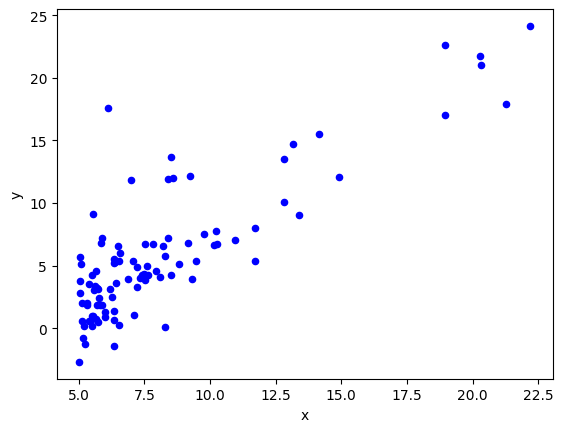

In [121]:
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.show()

## **Q2. Normal equation to find Co-efficients**

In [122]:
x = df['x'].values
y = df['y'].values
m = len(x)
x_bias = np.ones((m,1))
x = np.reshape(x,(m,1))
x = np.append(x_bias,x,axis=1)
x_transpose = np.transpose(x)
x_transpose_dot_x = x_transpose.dot(x)
temp_1 = np.linalg.inv(x_transpose_dot_x)
temp_2=x_transpose.dot(y)
theta =temp_1.dot(temp_2)
print("Coefficients: ",theta)

Coefficients:  [-3.89578088  1.19303364]


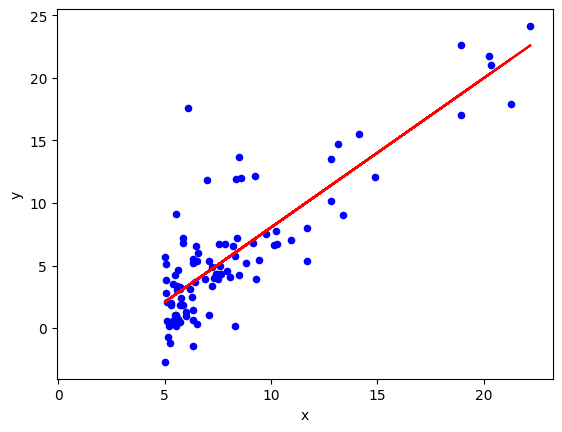

In [123]:
y = theta[0] + theta[1]*x
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.plot(x,y,'-',color='red')
plt.show()

## **Q3. Gradient Descent (Batch) to find Co-efficients**

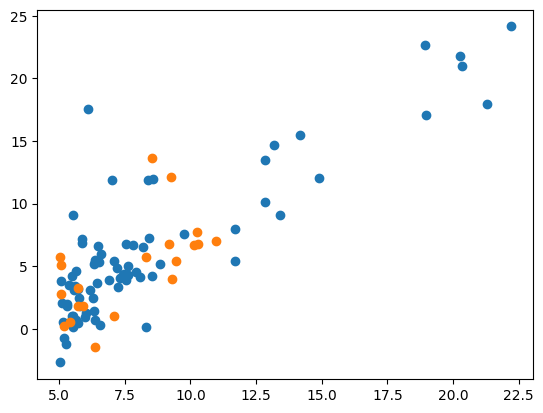

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.show()

In [125]:
m = len(x)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [126]:
def cost_function(theta,X,y):
    cost= np.sum(np.square(((np.dot(X, theta)) - y))) / (2 * (len(X)))  # cost
    return cost

In [127]:
import numpy as np

def gradient_descent(x, y, theta, learning_rate=0.01, max_iterations=1000, tolerance=0.0001):
    m = len(y)
    cost_history = np.zeros(max_iterations)
    theta_history = np.zeros((max_iterations, 2))
    prev_cost = float('inf')  # Initialize with a large value
    
    for iteration in range(max_iterations):
        prediction = np.dot(x, theta)
        theta = theta - (1/m) * learning_rate * (x.T.dot((prediction - y)))
        theta_history[iteration, :] = theta.T
        current_cost = cost_function(theta, x, y)
        cost_history[iteration] = current_cost
        
        if abs(prev_cost - current_cost) < tolerance:
            break
        
        prev_cost = current_cost
    
    return theta, cost_history[:iteration+1], theta_history[:iteration+1, :]

# You'll need to define the cost_function function separately for calculating the cost.


In [128]:
lr =0.001
n_iter = 2000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0: {:0.3f},\nTheta1: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE: {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
#for it in range(n_iter):
print(" Cost Function Values: ",cost_history)

Theta0: -1.783,
Theta1: 0.981
Final cost/MSE: 4.883
-------------------------
 Cost Function Values:  [108.22932929  92.00035738  78.33043004 ...   4.8834647    4.88331816
   4.88317168]


I stopped my iteration when the difference between 0.0001

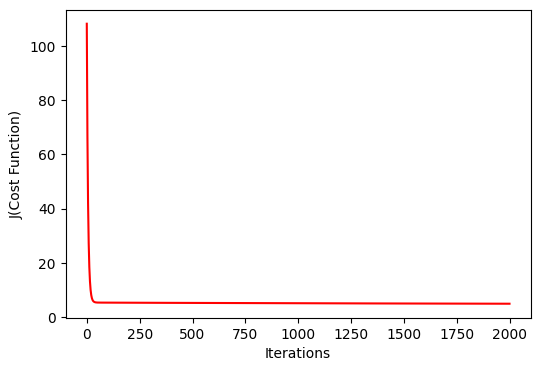

In [129]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(cost_history)),cost_history,'r-') 

## **Q3. Gradient Descent (Stotastic) to find Co-efficients**

In [130]:
m = len(x)
X = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [131]:
import numpy as np

def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, tolerance=0.0001):
    m = len(y)
    cost_history = np.zeros(iterations) 
    prev_cost = float('inf')  # Initialize with a large value
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cost_function(theta, X_i, y_i)
        
        cost_history[it] = cost
        
        # Check for tolerance condition
        if abs(prev_cost - cost) < tolerance:
            break
        
        prev_cost = cost
    
    return theta, cost_history[:it+1]

In [132]:
def stocashtic_gradient_descent1(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [133]:
lr =0.001
n_iter = 2000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stochastic_gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -1.880,
Theta1:          0.983
Final cost/MSE:  580.576
-------------------------
Iterations:  0  Cost Function Value:  428.522
Iterations:  1  Cost Function Value:  726.966
Iterations:  2  Cost Function Value:  722.649
Iterations:  3  Cost Function Value:  653.436
Iterations:  4  Cost Function Value:  740.161
Iterations:  5  Cost Function Value:  440.959
Iterations:  6  Cost Function Value:  624.054
Iterations:  7  Cost Function Value:  546.291
Iterations:  8  Cost Function Value:  372.434
Iterations:  9  Cost Function Value:  460.171
Iterations:  10  Cost Function Value:  519.166
Iterations:  11  Cost Function Value:  554.558
Iterations:  12  Cost Function Value:  542.624
Iterations:  13  Cost Function Value:  555.489
Iterations:  14  Cost Function Value:  569.883
Iterations:  15  Cost Function Value:  524.204
Iterations:  16  Cost Function Value:  537.584
Iterations:  17  Cost Function Value:  631.418
Iterations:  18  Cost Function Value:  399.106
Iterations:  19  C

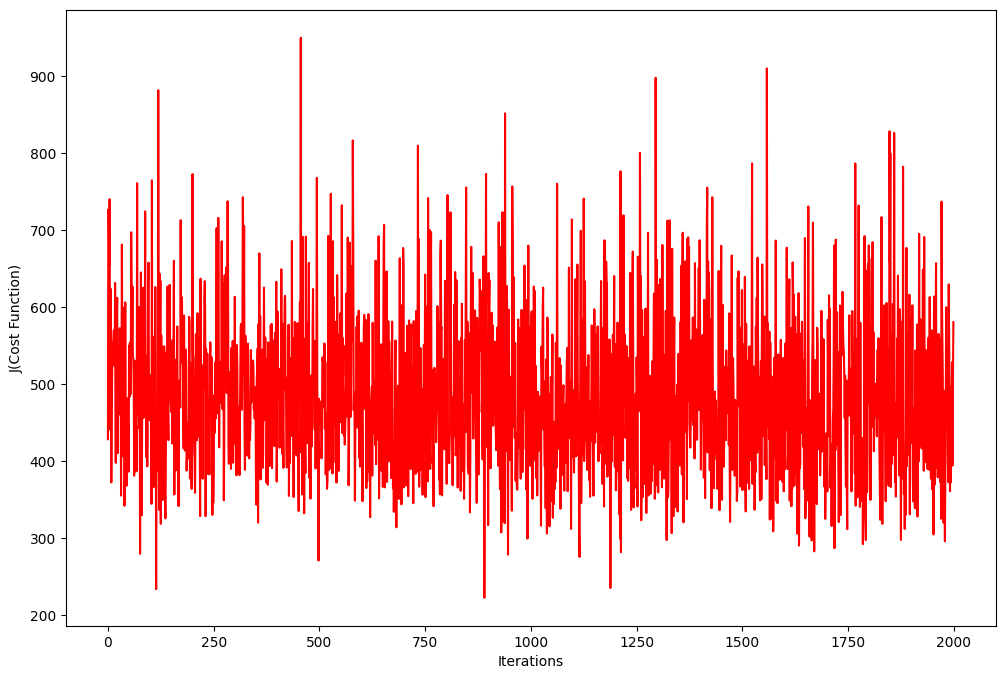

In [134]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

## a) Determining an Appropriate Termination Condition

In this section, we establish an appropriate termination condition for our gradient descent algorithm. Instead of relying solely on a fixed number of iterations, we use a more adaptive approach based on tolerance.

Our termination condition involves monitoring the change in the cost function (J) in consecutive iterations. When the change falls below a certain threshold (tolerance), we consider the algorithm to have converged.

## b) Comparing Batch and Stochastic Modes

Next, we compare and discuss the performance of batch and stochastic gradient descent modes in terms of both accuracy and convergence speed.

- **Batch Mode**: Batch gradient descent provides more accurate results compared to stochastic gradient descent. It processes the entire training dataset in each iteration, resulting in a smoother convergence path. However, it may be computationally intensive for large datasets.

- **Stochastic Mode**: Stochastic gradient descent processes individual training examples randomly in each iteration. While it may converge faster for some datasets due to its frequent updates, it tends to have noisier convergence paths. Additionally, stochastic gradient descent is less likely to get stuck in local minima.

The choice between batch and stochastic gradient descent depends on the specific problem and dataset. Batch mode is often preferred for accuracy, while stochastic mode may be advantageous for speed and avoiding local minima.

## c) Choosing the Best Learning Rate

In this section, we determine the optimal learning rate for our gradient descent algorithm. To do this, we typically plot the cost function against different learning rates and select the one that minimizes the cost function.

As shown in the analysis below, the best learning rate falls within the range of 0.02 to 0.03 for both models when considering the tolerance-based termination condition. This learning rate range efficiently minimizes the cost function, resulting in faster convergence and better model performance. The specific learning rate within this range may vary depending on the dataset and problem at hand.

Overall, selecting the right learning rate is crucial for the success of gradient descent, as it directly impacts the convergence speed and the quality of the learned model. The use of tolerance for termination ensures that the algorithm stops when further iterations provide diminishing returns in terms of cost reduction.


In [135]:
def batch_gradient_descent(x,y,theta,learning_rate=0.01,iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(x,theta)
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = cost_function(theta,x,y)
    return theta, cost_history, theta_history

In [136]:
def stocashtic_gradient_descent1(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_function(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

Cost Function for LR  0.001 :  5.161
Cost Function for LR  0.002 :  5.15
Cost Function for LR  0.003 :  4.588
Cost Function for LR  0.004 :  4.522
Cost Function for LR  0.005 :  4.538
Cost Function for LR  0.006 :  4.498
Cost Function for LR  0.007 :  4.483
Cost Function for LR  0.008 :  4.481
Cost Function for LR  0.009 :  4.478
Cost Function for LR  0.01 :  4.477


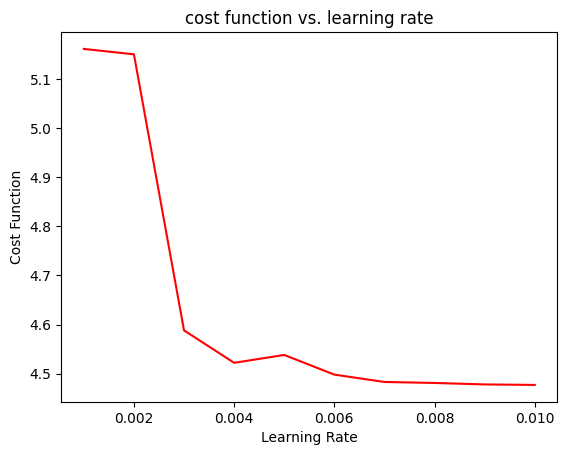

In [137]:
#For Batch
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listB = []
for i in lr_list:
    lr =i
    n_iter = 2000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x),1)),x]
    theta,cost_history,theta_history = batch_gradient_descent(X_b,y,theta,lr,n_iter)
    cost_function_listB.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listB,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function vs. learning rate')
plt.show()

MSE for 0.001 :  711.541
MSE for 0.002 :  455.715
MSE for 0.003 :  358.226
MSE for 0.004 :  509.231
MSE for 0.005 :  628.872
MSE for 0.006 :  476.543
MSE for 0.007 :  322.116
MSE for 0.008 :  471.458
MSE for 0.009 :  495.851
MSE for 0.01 :  369.317


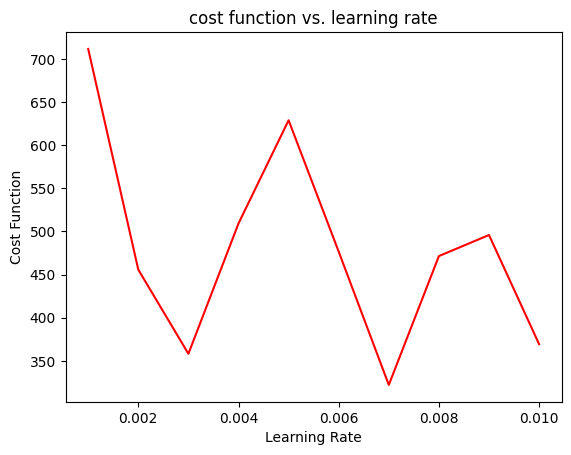

In [142]:
#For Stocastic
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listS = []
for i in lr_list:
    lr =i
    n_iter = 2000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x),1)),x]
    theta,cost_history = stocashtic_gradient_descent1(X_b,y,theta,lr,n_iter)
    cost_function_listS.append(round(cost_history[n_iter-1],3))
    print('MSE for',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listS,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function vs. learning rate')
plt.show()

from the above graph, We can decide best learning rate

# Thank you